# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import os
from astropy.modeling import models
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import astropy.time as at
from scipy.special import voigt_profile
import Analysis_functions as AF
from importlib import reload
import itertools
import scipy.odr as so
import scipy.stats as ss
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.colors as mc

# Defining Useful variables

In [15]:
days = ['2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', 
        '2023-01-25', '2023-01-26', '2023-01-27', '2023-02-01', '2023-02-02', '2023-02-03',
        '2023-02-06', '2023-02-15', '2023-02-16']
new = True

blaze_dir = 'Blaze-data'
dir_name = 'Corr-data'
CCF_dir_name = 'CCF_RV-data'
HARPS_directory = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/new_Solar-data/'
fit_params_dict = {}
fit_params_Si_dict = {}
fit_params_T_dict = {}
fit_err_dict = {}
fit_err_Si_dict = {}
fit_err_T_dict = {}
time_dict = {}

# Extracting, reducing the data
# Fitting line + plotting periodogram (He triplet + Si line + Water line)

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


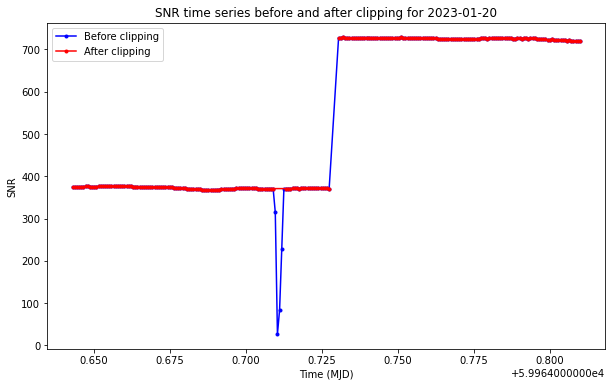

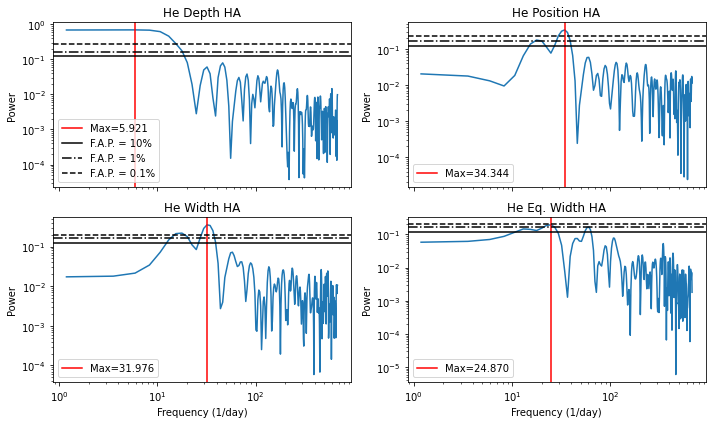

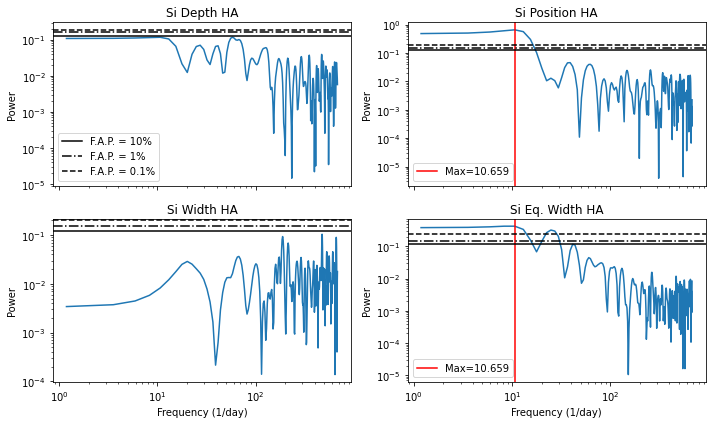

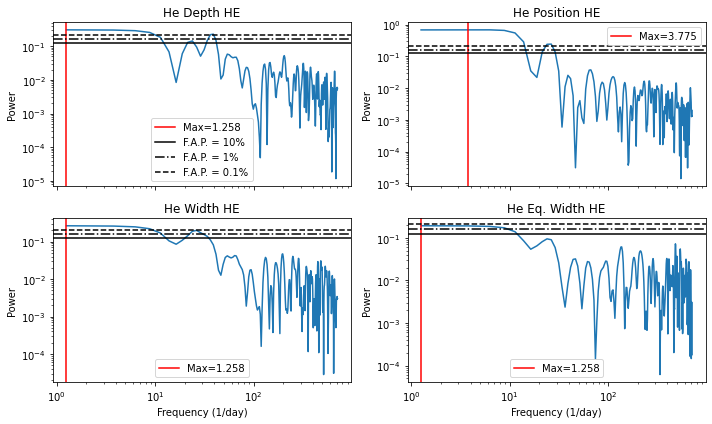

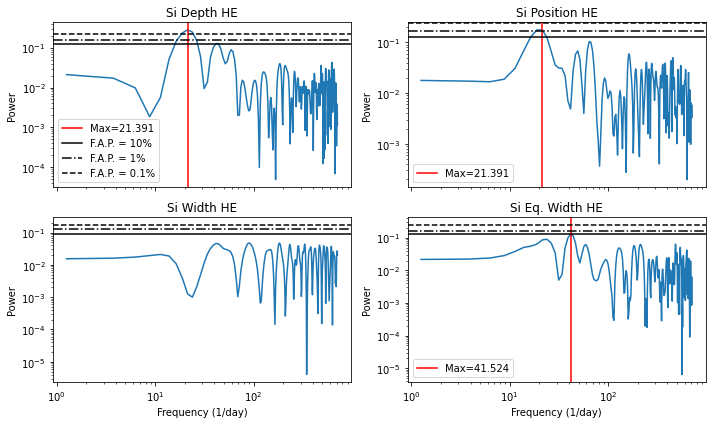

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


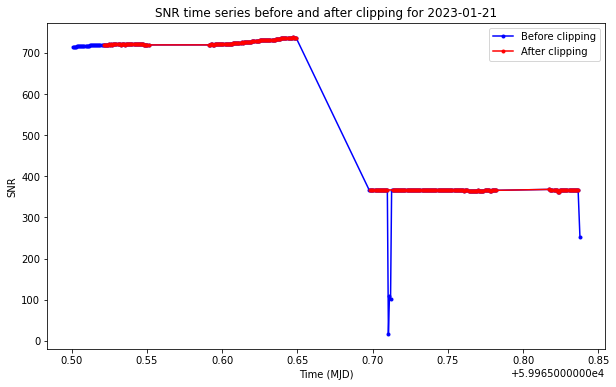

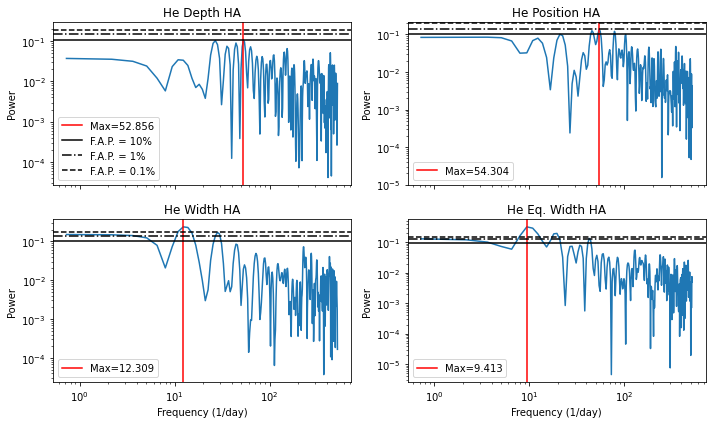

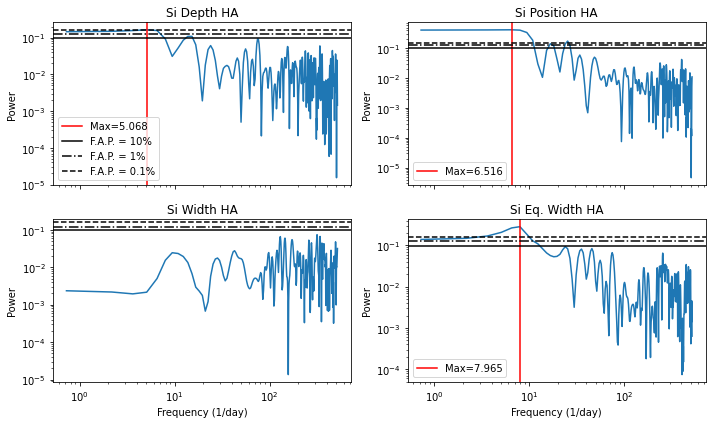

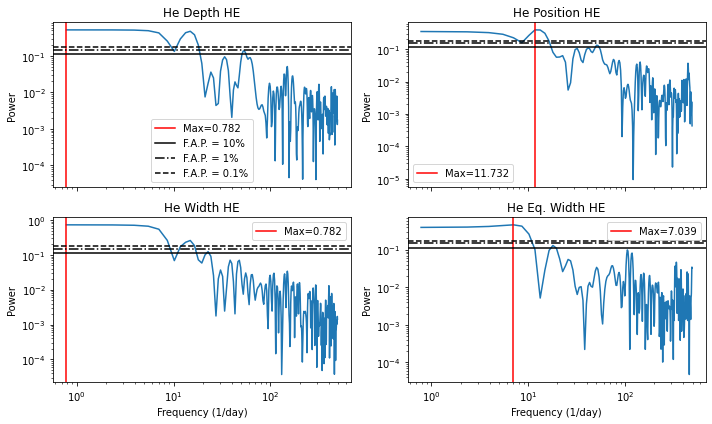

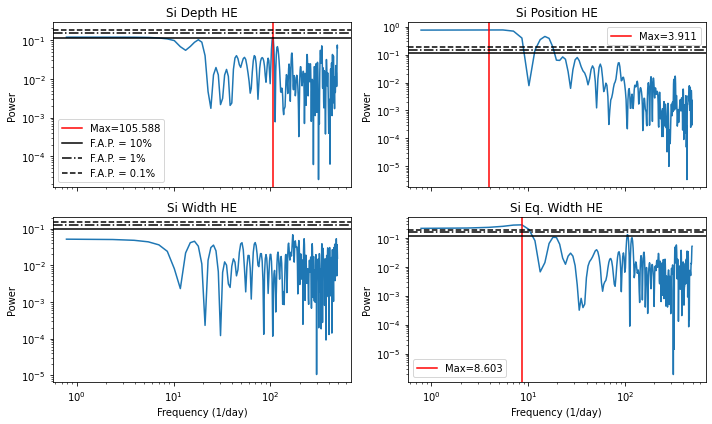

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


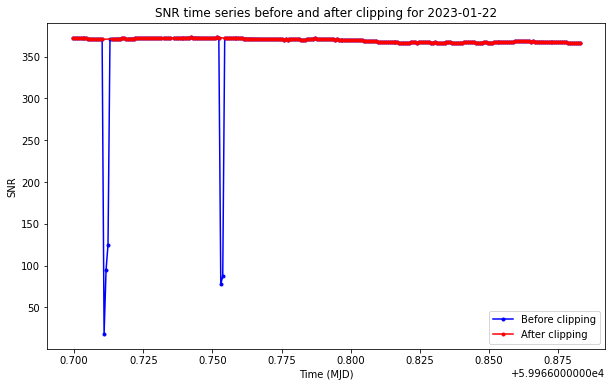

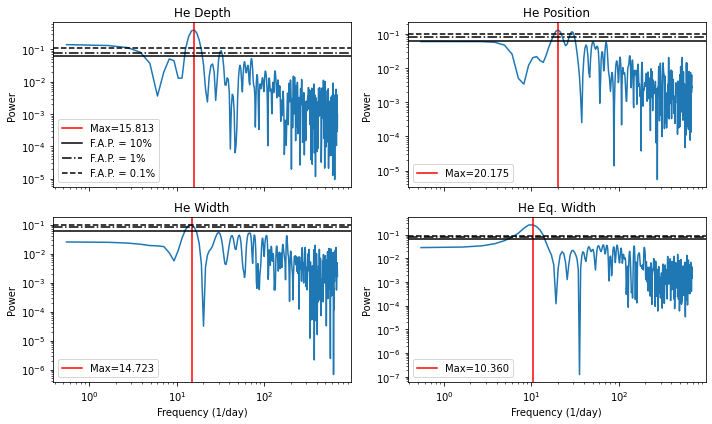

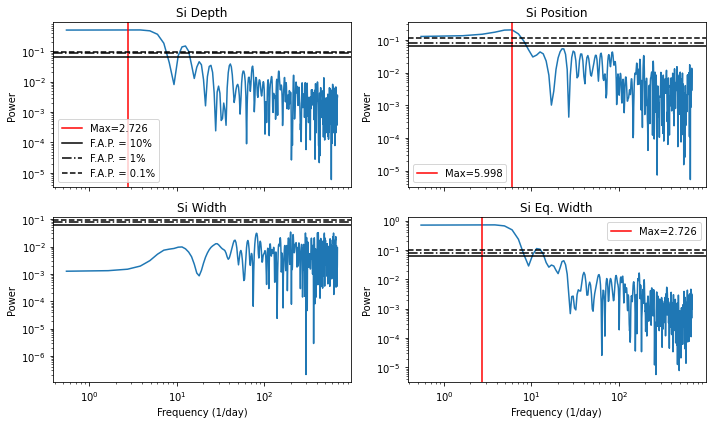

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


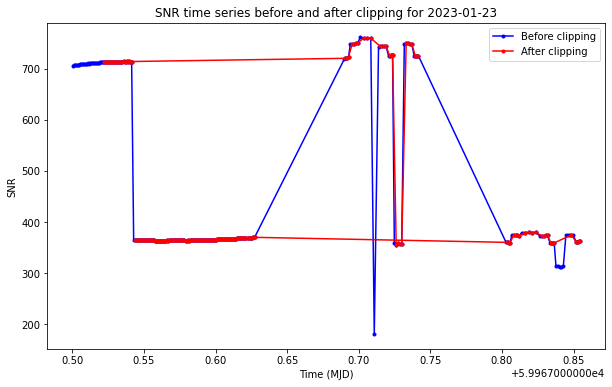

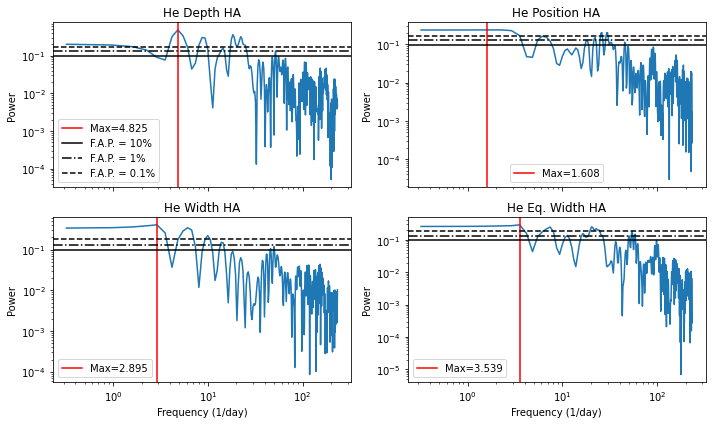

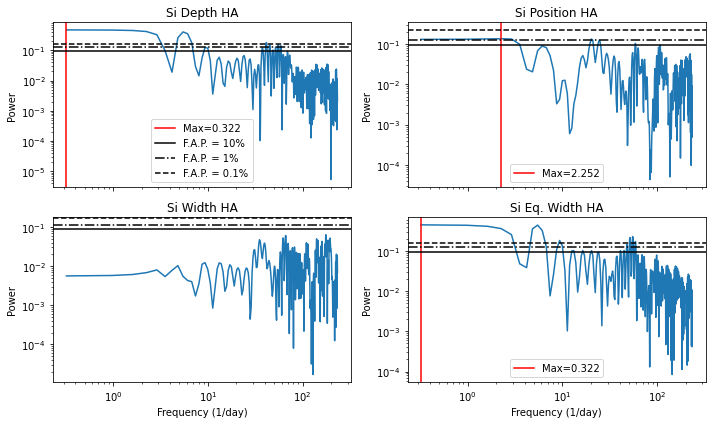

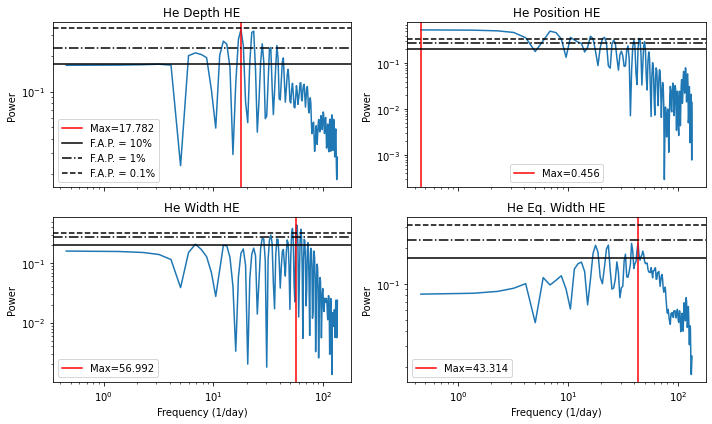

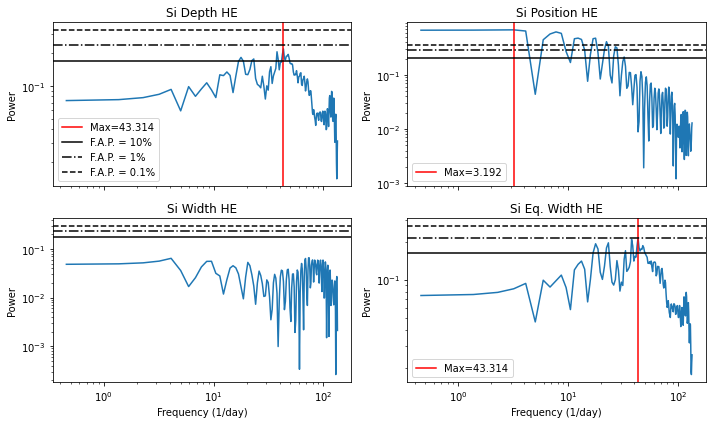

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


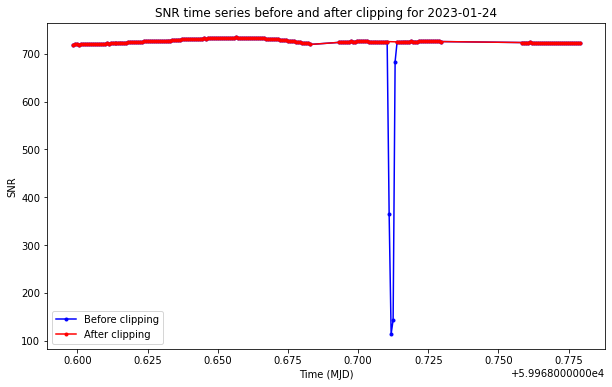

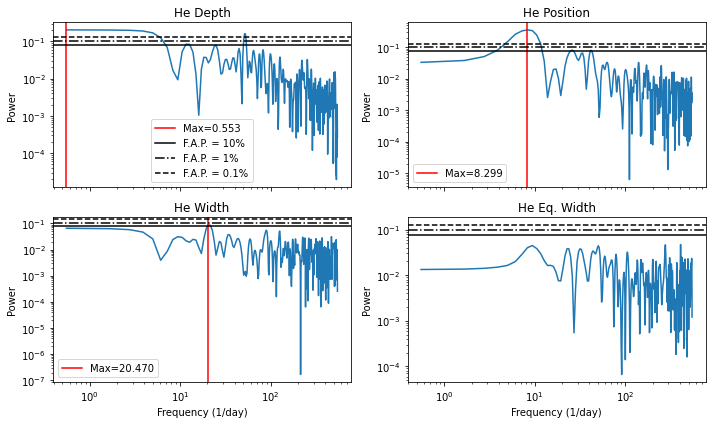

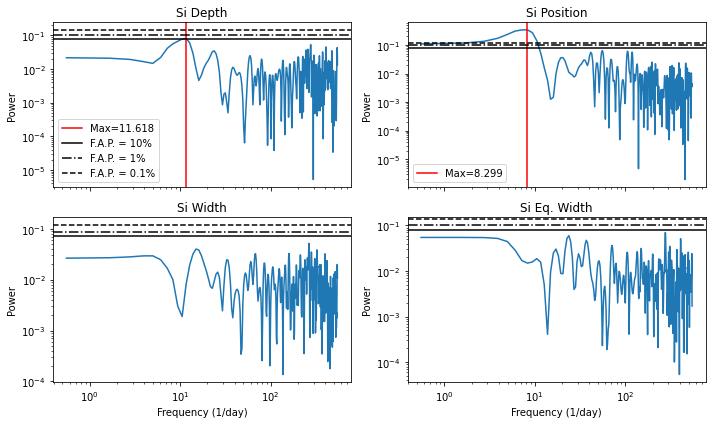

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


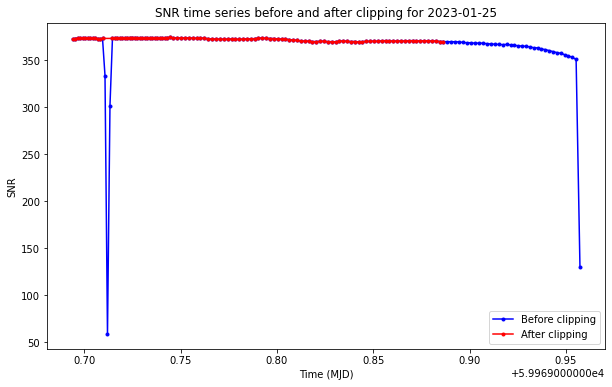

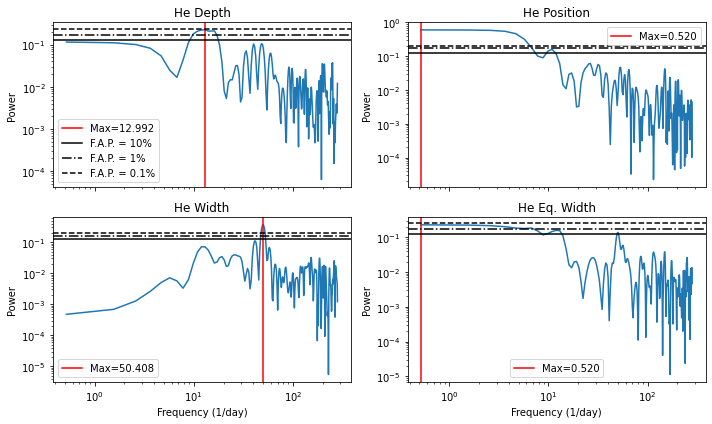

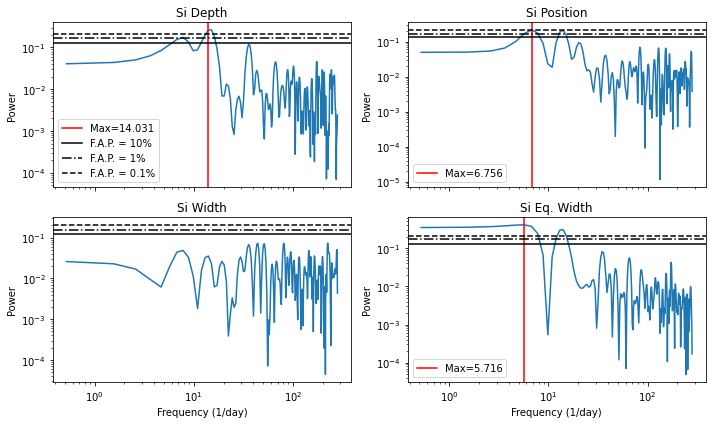

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


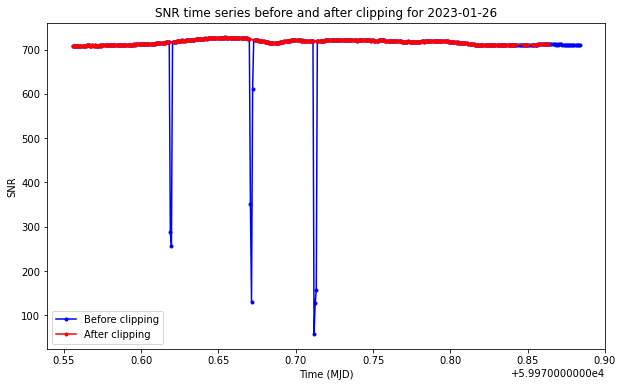

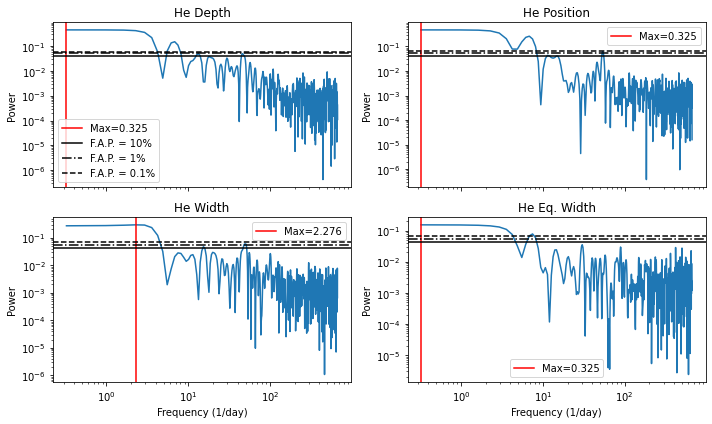

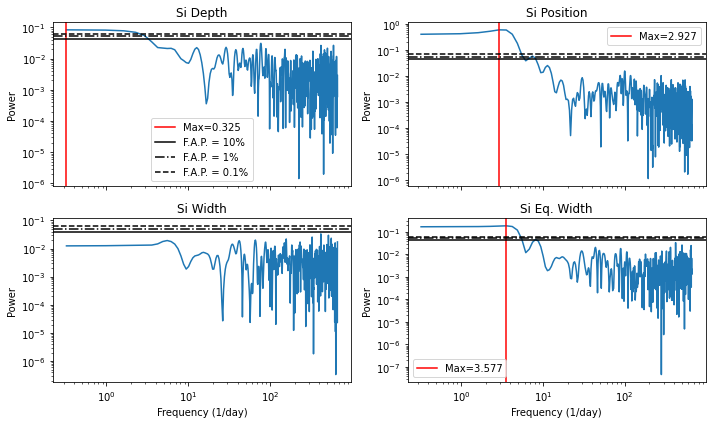

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


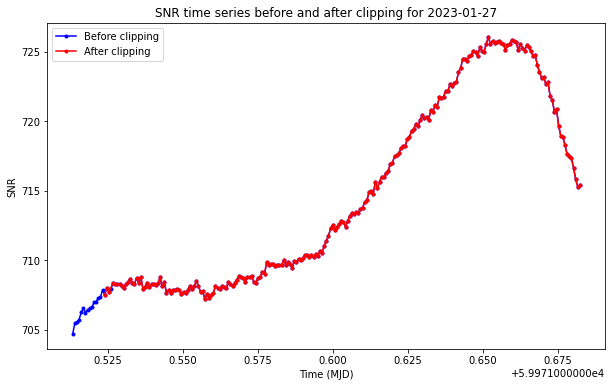

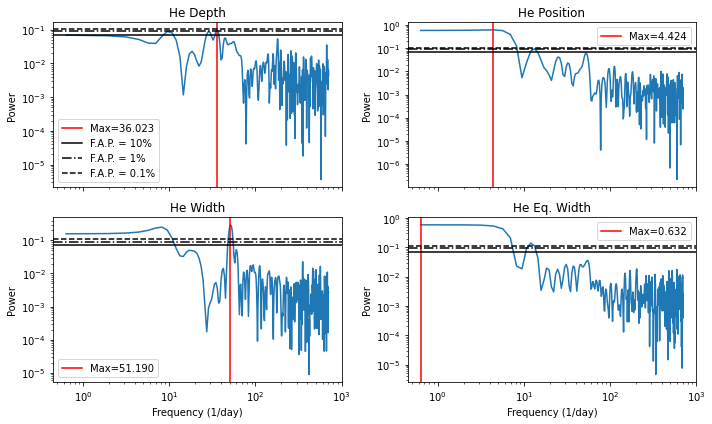

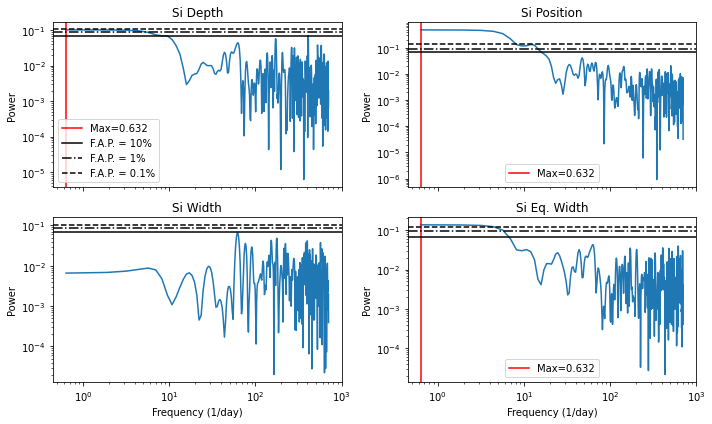

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


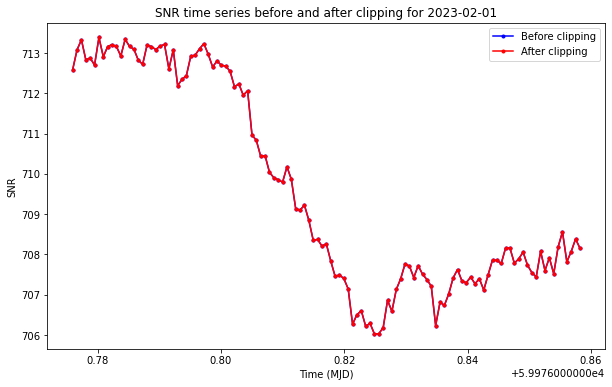

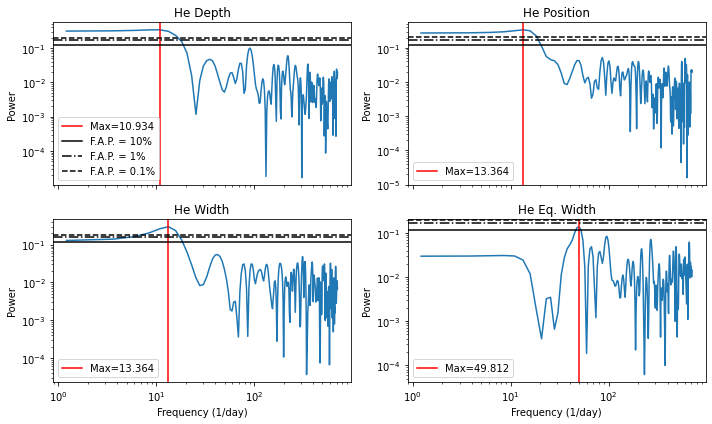

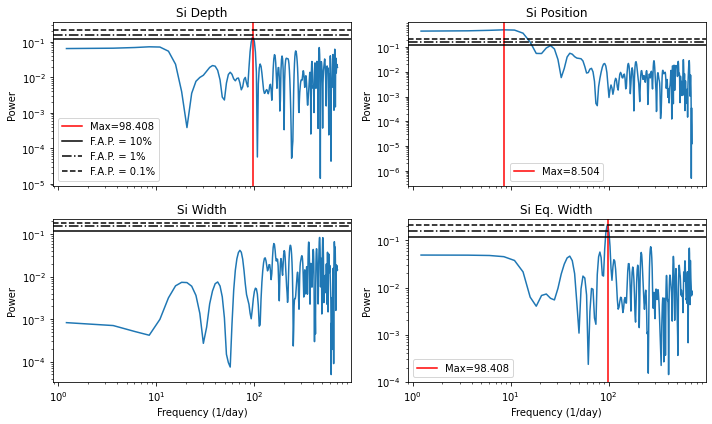

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


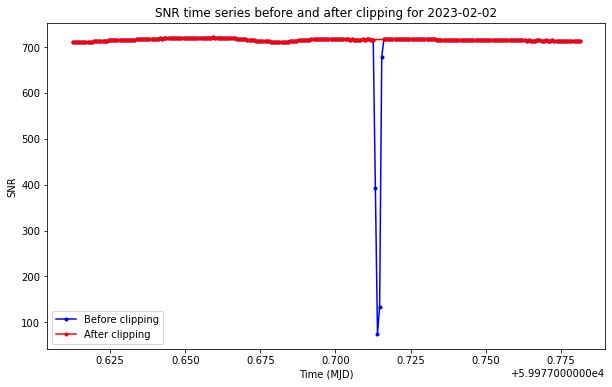

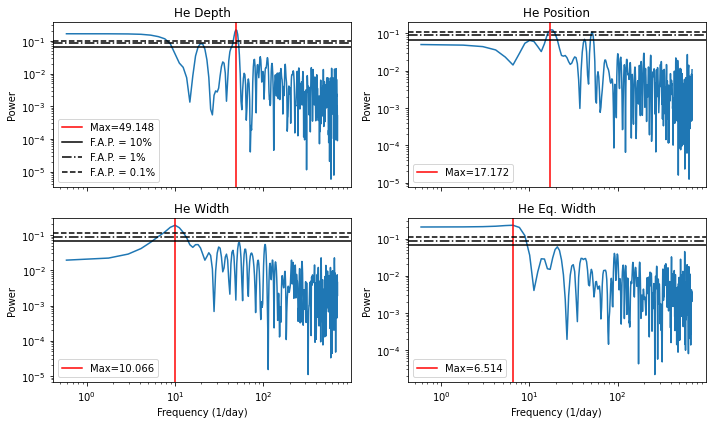

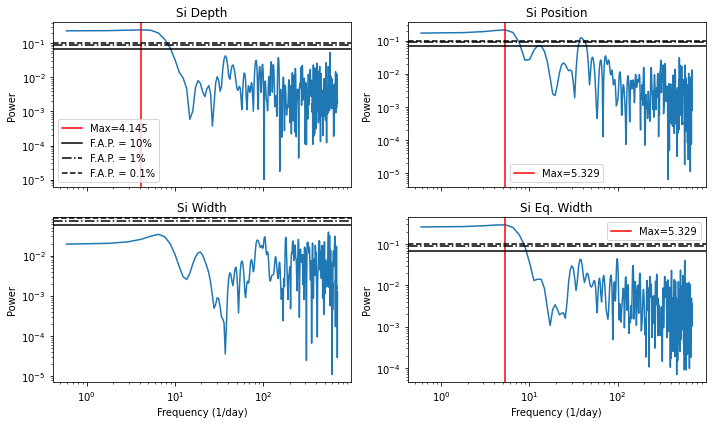

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


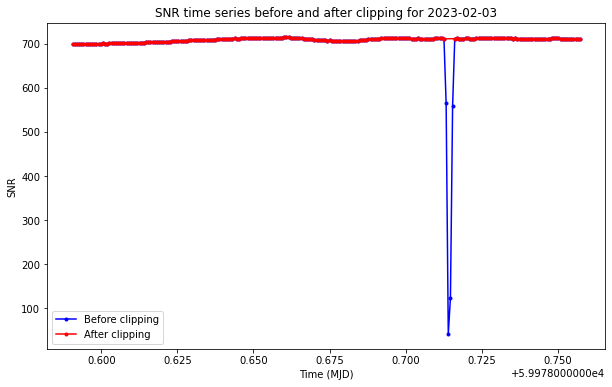

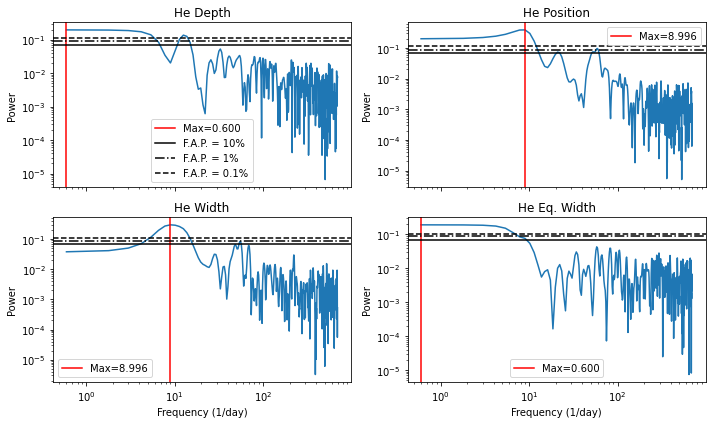

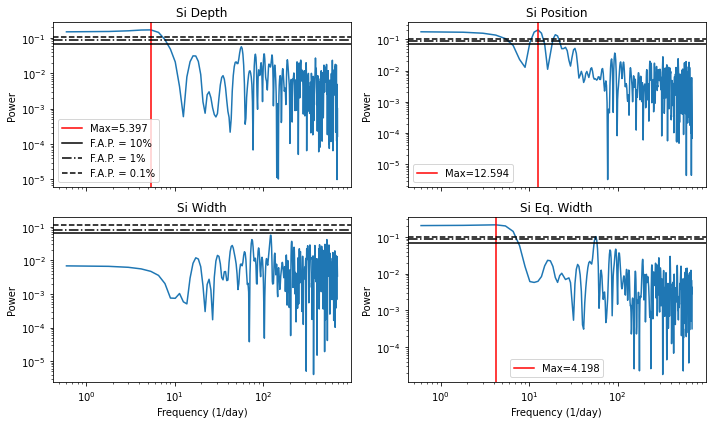

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


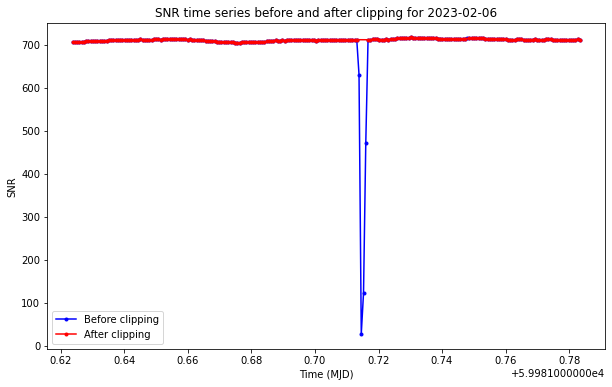

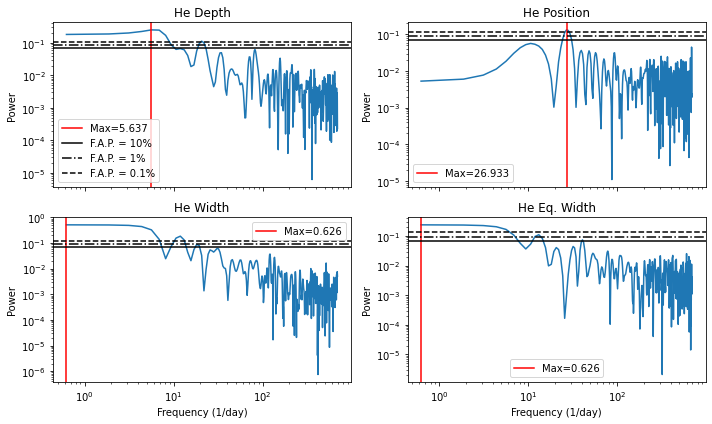

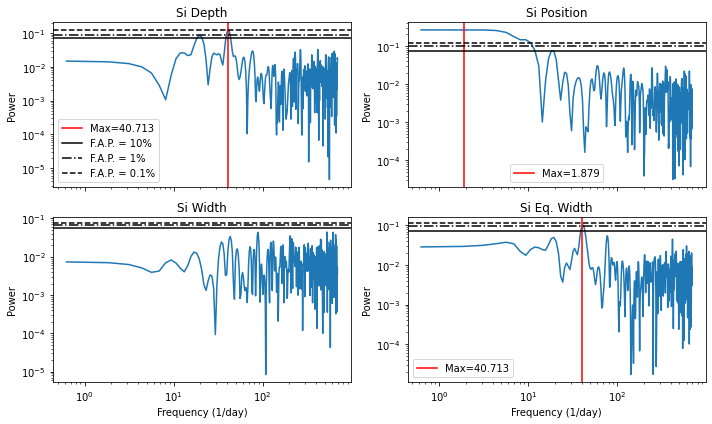

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


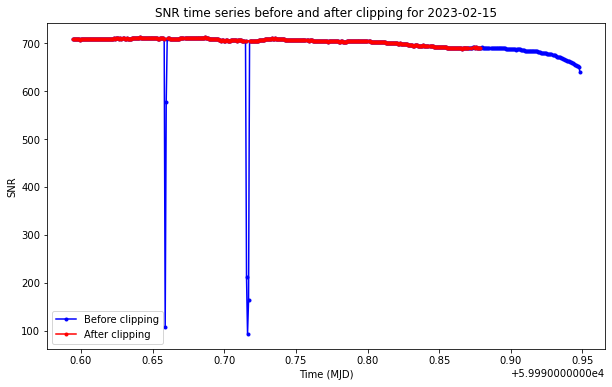

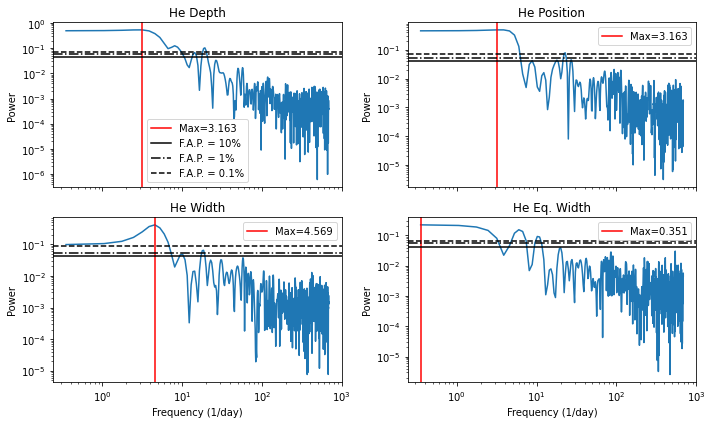

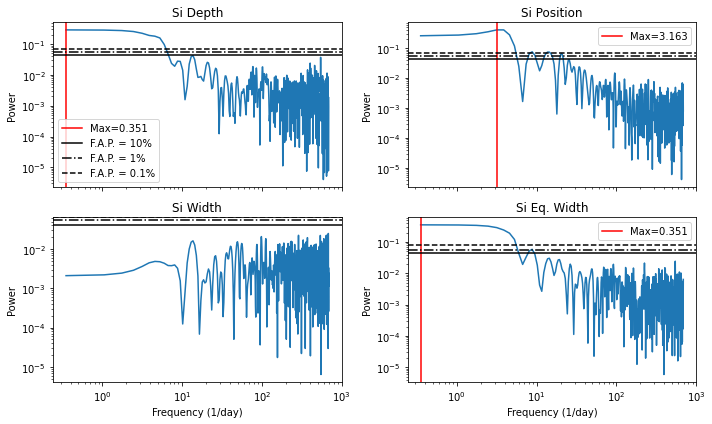

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


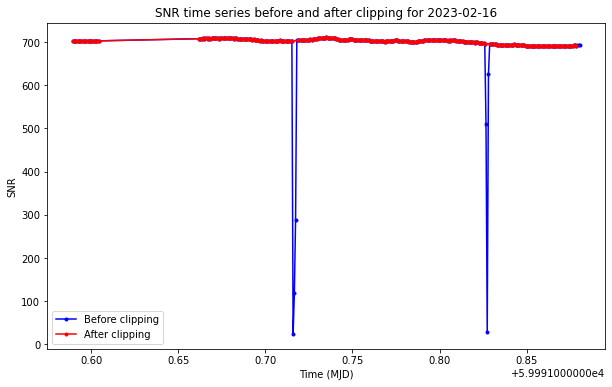

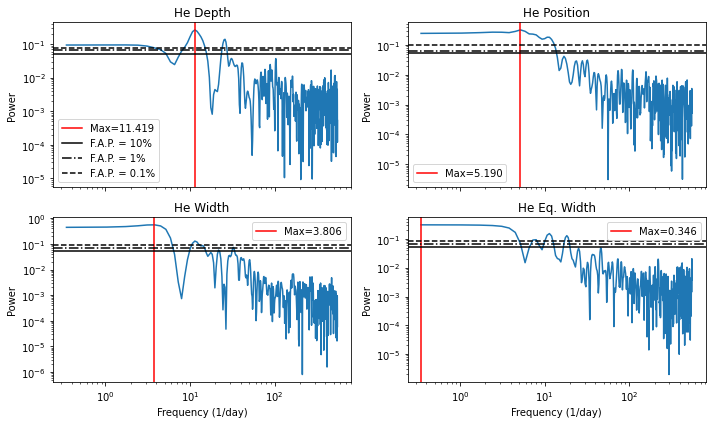

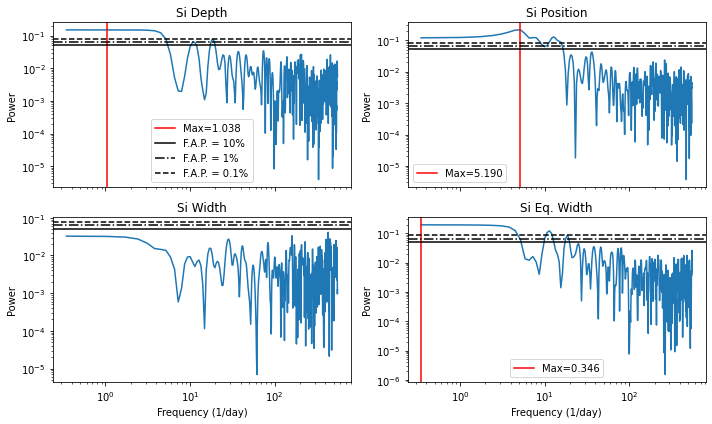

In [16]:
reload(AF)

for day in days:
    
    #Defining the location
    location = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/new_Solar-data/'+day
    os.chdir(location)
    if not os.path.exists('Plot_Results'):
        os.mkdir('Plot_Results')
    
    #Extracting the data
    if new:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM 
        long_dataset = AF.new_extraction(dir_name, blaze_dir, CCF_dir_name, 14)

    else:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM 
        long_dataset = AF.extraction(dir_name, blaze_dir, CCF_dir_name, 14)
    
    #For data reduction and plotting
    tot_SNR = long_dataset[5]
    tot_mode = long_dataset[6]
    tot_date = long_dataset[7]
    tot_RV = long_dataset[8]
    tot_AIRM = long_dataset[-1]
    sig = 200
    
    #For fitting the He triplet
    lower_lim_He = 10831.5
    upper_lim_He = 10834.1
    guess_params_He = [-0.06, -100, 10833.3, 0.1, 0.008]
    bounds_param_He = ((-np.inf, -np.inf, 10833.2, -np.inf, -np.inf),(0, np.inf, 10833.4, np.inf, np.inf)) 

    #For fitting the Si line
    lower_lim_Si = 10828
    upper_lim_Si = 10832
    guess_params_Si = [0.3, 0.6, 10830, 0.1, 0.2]
    bounds_param_Si = ((-np.inf, -np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf, np.inf))

    #For plotting the False alarm probability
    probas = [0.1, 0.01, 0.001]

    #Distinguish two cases depending on the number of modes of observation
    #If there are two modes of observation
    if np.sum(tot_mode=='A') != len(tot_mode) and np.sum(tot_mode=='E')!= len(tot_mode):
        total_lamda_HA, total_lamda_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr_HA, total_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr_HA, total_norm_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err_HA, total_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err_HA, total_norm_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)
        
        total_SNR_HA, total_SNR_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date_HA, date_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV_HA, total_RV_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err_HA, total_RV_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM_HA, total_FWHM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err_HA, total_FWHM_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_HA, total_BIS_SPAN_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err_HA, total_BIS_SPAN_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST_HA, total_CONTRAST_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err_HA, total_CONTRAST_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O_HA, total_H2O_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err_HA, total_H2O_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2_HA, total_O2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err_HA, total_O2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2_HA, total_CO2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err_HA, total_CO2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM_HA, total_AIRM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date_HA, total_SNR_HA, 'r.', linestyle='-', label='After clipping')
        plt.plot(date_HE, total_SNR_HE, 'r.', linestyle='-')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()

        #Fitting the He triplet - HA
        theta_HA, err_theta_HA = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                               bounds_param_He, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r', False)

        LS_depth_HA = LombScargle(date_HA, theta_HA[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HA, theta_HA[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_position_HA = LombScargle(date_HA, theta_HA[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HA, theta_HA[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_width_HA = LombScargle(date_HA, theta_HA[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HA, theta_HA[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_ew_HA = LombScargle(date_HA, theta_HA[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HA, theta_HA[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        if np.max(LS_depth_HA[1])>FAP_depth[0]:
            max_depth = LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        if np.max(LS_position_HA[1])>FAP_position[0]:
            max_position = LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        if np.max(LS_width_HA[1])>FAP_width[0]:
            max_width = LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            max_ew = LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth HA')
        ax2.set_title('He Position HA')
        ax3.set_title('He Width HA')
        ax4.set_title('He Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HA[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HA[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()
        
        #Fitting the Si line - HA
        theta_Si_HA, err_theta_Si_HA = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                               bounds_param_Si, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r', False)

        LS_depth_HA = LombScargle(date_HA, theta_Si_HA[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HA, theta_Si_HA[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position_HA = LombScargle(date_HA, theta_Si_HA[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HA, theta_Si_HA[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_width_HA = LombScargle(date_HA, theta_Si_HA[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HA, theta_Si_HA[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_ew_HA = LombScargle(date_HA, theta_Si_HA[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HA, theta_Si_HA[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        if np.max(LS_depth_HA[1])>FAP_depth[0]:
            max_depth = LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        if np.max(LS_position_HA[1])>FAP_position[0]:
            max_position = LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        if np.max(LS_width_HA[1])>FAP_width[0]:
            max_width = LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            max_ew = LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth HA')
        ax2.set_title('Si Position HA')
        ax3.set_title('Si Width HA')
        ax4.set_title('Si Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HA[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HA[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Fitting the H2O line - HA
        
        
        #Fitting the He triplet - HE
        theta_HE, err_theta_HE = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                       bounds_param_He, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k', False)

        LS_depth_HE = LombScargle(date_HE, theta_HE[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HE, theta_HE[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_position_HE = LombScargle(date_HE, theta_HE[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HE, theta_HE[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width_HE = LombScargle(date_HE, theta_HE[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HE, theta_HE[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew_HE = LombScargle(date_HE, theta_HE[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HE, theta_HE[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        if np.max(LS_depth_HE[1])>FAP_depth[0]:
            max_depth = LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        if np.max(LS_position_HE[1])>FAP_position[0]:
            max_position = LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        if np.max(LS_width_HE[1])>FAP_width[0]:
            max_width = LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            max_ew = LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth HE')
        ax2.set_title('He Position HE')
        ax3.set_title('He Width HE')
        ax4.set_title('He Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HE[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HE[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Fitting the Si line - HE
        theta_Si_HE, err_theta_Si_HE = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                       bounds_param_Si, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k', False)

        LS_depth_HE = LombScargle(date_HE, theta_Si_HE[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HE, theta_Si_HE[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_position_HE = LombScargle(date_HE, theta_Si_HE[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HE, theta_Si_HE[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width_HE = LombScargle(date_HE, theta_Si_HE[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HE, theta_Si_HE[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew_HE = LombScargle(date_HE, theta_Si_HE[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HE, theta_Si_HE[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        if np.max(LS_depth_HE[1])>FAP_depth[0]:
            max_depth = LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        if np.max(LS_position_HE[1])>FAP_position[0]:
            max_position = LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        if np.max(LS_width_HE[1])>FAP_width[0]:
            max_width = LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            max_ew = LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth HE')
        ax2.set_title('Si Position HE')
        ax3.set_title('Si Width HE')
        ax4.set_title('Si Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HE[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HE[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Fitting the H2O line - HE

        #Storing the best-fit values and their errors - HE TRIPLET
        fit_params_dict[f"{day} HA"] = theta_HA
        fit_params_dict[f"{day} HE"] = theta_HE
        
        fit_err_dict[f"{day} HA"] = err_theta_HA
        fit_err_dict[f"{day} HE"] = err_theta_HE
        
        time_dict[f"{day} HA"] = date_HA
        time_dict[f"{day} HE"] = date_HE
        
        #Storing the best-fit values and their errors - Si LINE
        fit_params_Si_dict[f"{day} HA"] = theta_Si_HA
        fit_params_Si_dict[f"{day} HE"] = theta_Si_HE
        
        fit_err_Si_dict[f"{day} HA"] = err_theta_Si_HA
        fit_err_Si_dict[f"{day} HE"] = err_theta_Si_HE
 
        #Storing the best-fit values and their errors - H2O LINE
        #fit_params_T_dict[f"{day} HA"] = theta_T_HA
        #fit_params_T_dict[f"{day} HE"] = theta_T_HE 
        
        #fit_err_T_dict[f"{day} HA"] = err_theta_T_HA
        #fit_err_T_dict[f"{day} HE"] = err_theta_T_HE

    #If there is one mode of observation
    else:
        total_lamda = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)

        total_SNR = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date, total_SNR, 'r.', linestyle='-', label='After clipping')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()
        
        #Fitting the He triplet 
        theta, err_theta = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                             bounds_param_He, total_lamda, total_norm_spctr, total_norm_err, 'r', False)
        
        LS_depth = LombScargle(date, theta[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date, theta[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
            
        LS_position = LombScargle(date, theta[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date, theta[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width = LombScargle(date, theta[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date, theta[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew = LombScargle(date, theta[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date, theta[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        if np.max(LS_depth[1])>FAP_depth[0]:
            max_depth = LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position[0], LS_position[1])
        if np.max(LS_position[1])>FAP_position[0]:
            max_position = LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width[0], LS_width[1])
        if np.max(LS_width[1])>FAP_width[0]:
            max_width = LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew[0], LS_ew[1])
        if np.max(LS_ew[1])>FAP_ew[0]:
            max_ew = LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth')
        ax2.set_title('He Position')
        ax3.set_title('He Width')
        ax4.set_title('He Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()
        
        #Fitting the Si line
        theta_Si, err_theta_Si = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                             bounds_param_Si, total_lamda, total_norm_spctr, total_norm_err, 'r', False)
        
        LS_depth = LombScargle(date, theta_Si[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date, theta_Si[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position = LombScargle(date, theta_Si[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date, theta_Si[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width = LombScargle(date, theta_Si[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date, theta_Si[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew = LombScargle(date, theta_Si[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date, theta_Si[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        if np.max(LS_depth[1])>FAP_depth[0]:
            max_depth = LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position[0], LS_position[1])
        if np.max(LS_position[1])>FAP_position[0]:
            max_position = LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width[0], LS_width[1])
        if np.max(LS_width[1])>FAP_width[0]:
            max_width = LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew[0], LS_ew[1])
        if np.max(LS_ew[1])>FAP_ew[0]:
            max_ew = LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth')
        ax2.set_title('Si Position')
        ax3.set_title('Si Width')
        ax4.set_title('Si Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Fitting the H2O line


        #Storing the best-fit values - HE TRIPLET
        fit_params_dict[f"{day}"] = theta
        
        fit_err_dict[f"{day}"] = err_theta
        
        time_dict[f"{day}"] = date
    
        #Storing the best-fit values and their errors - Si LINE
        fit_params_Si_dict[f"{day}"] = theta_Si
        
        fit_err_Si_dict[f"{day}"] = err_theta_Si
 
        #Storing the best-fit values and their errors - H2O LINE
        #fit_params_T_dict[f"{day}"] = theta_T
        
        #fit_err_T_dict[f"{day}"] = err_theta_T
        
    plt.show()
    

# Plotting the big dataset - He Triplet

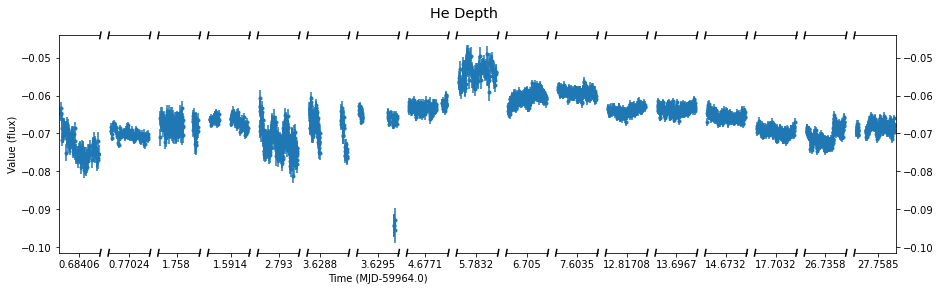

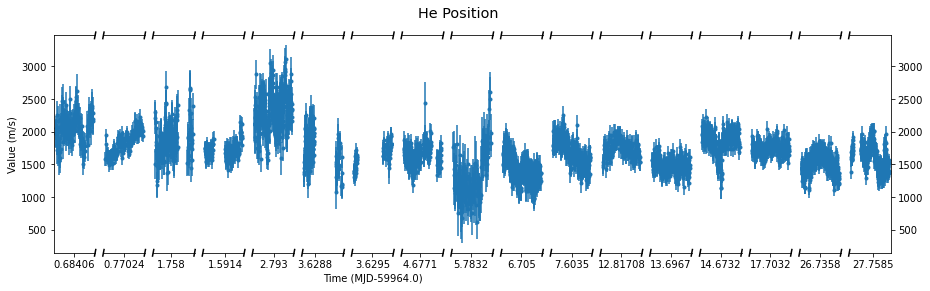

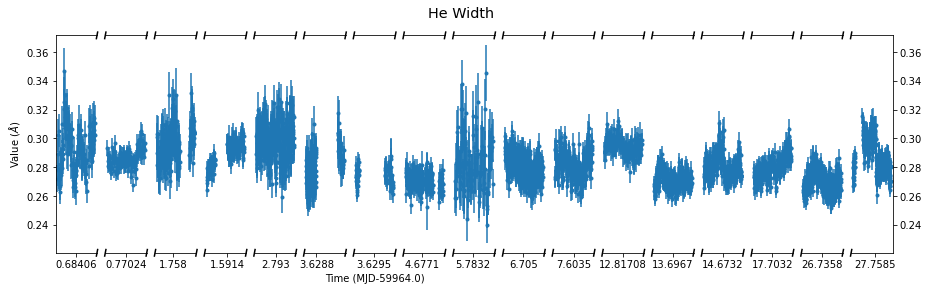

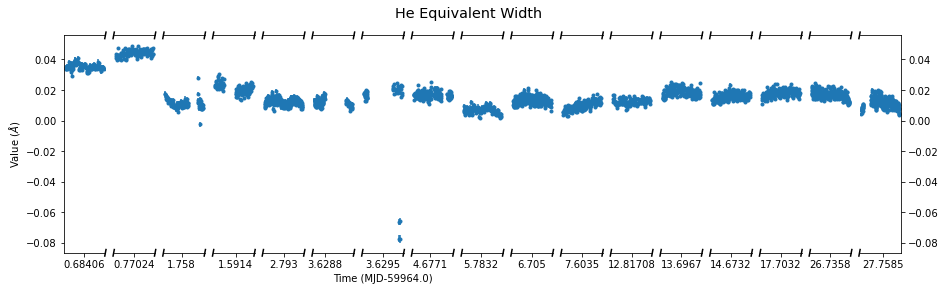

In [17]:
#Plotting one of the parameters of interest for all the days
params_of_interest = ['Depth', 'Position', 'Width', 'Equivalent Width']
units_of_interest = ['(flux)', '(m/s)', '($\AA$)', '($\AA$)'] 
indexes_of_interest = [0, 2, 3, -1]

#Reference value of the line of interest
ref_wav = AF.air2vac((10830.33977+10830.25010)/2) #From NIST database

#Line of interest 
line_name = 'He'

#Dictionnaries of interest
param_dictionnary = fit_params_dict
err_dictionnary = fit_err_dict
time_dictionnary = time_dict

#Define excess in time
excess=59964.0

for i in range(len(params_of_interest)):
    fig, axs = plt.subplots(1, len(param_dictionnary.keys()), sharey=True, figsize=[15, 4])
    fig.suptitle(line_name+' '+params_of_interest[i], fontsize="x-large")
    axs = axs.ravel()

    # Loop over the keys and values in the param_dictionnary dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)

        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = np.array([time-excess for time in time_dictionnary[day]])
        if params_of_interest[i]=='Position':
            axs[index].errorbar(time_list, (param_list-ref_wav)*3e8/ref_wav, yerr=err_list*3e8/ref_wav, fmt='.', label=day)
        else:
            axs[index].errorbar(time_list, param_list, yerr=err_list, fmt='.', label=day)

        #Adding the breaks
        d = .015  

        if index==0:
            axs[index].spines['right'].set_visible(False)
            axs[index].set_ylabel('Value '+units_of_interest[i])
            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right

        elif index==len(fit_params_dict.keys())-1:
            axs[index].spines['left'].set_visible(False)
            axs[index].yaxis.tick_right()
            axs[index].tick_params(labelright='off')

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axs[index].plot((-d, +d), (-d, +d), **kwargs) #Bottom left

        else:
            axs[index].spines['right'].set_visible(False)
            axs[index].spines['left'].set_visible(False)
            axs[index].get_yaxis().set_visible(False)

            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs)
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs)
            axs[index].plot((-d, +d), (-d, +d), **kwargs)

        axs[index].set_xticks([np.mean(time_list)])
        axs[7].set_xlabel('Time (MJD-'+str(excess)+')', ha='right')

    plt.show()



# Inspecting the periodograms and fitting long-term trend - He triplet

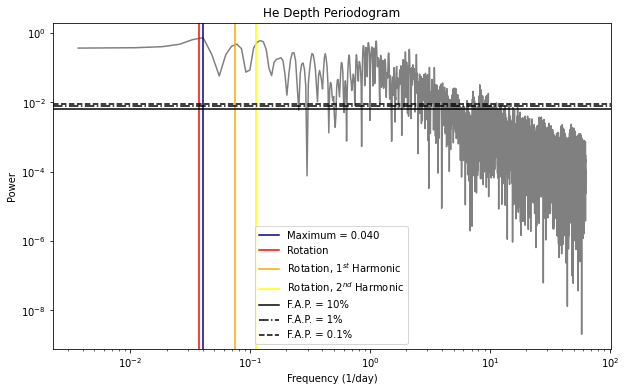

chisq=13958.221000979867  with 3404 degrees of freedom
For  Depth
parameter: Amplitude Cos: 0.01672028175642624
   95% conf interval: 0.016536068677270716 0.016904494835581766
   tstat: 149.33740289352008
   pstat: 0.0
parameter: Amplitude Sin: -0.009025569513432377
   95% conf interval: -0.009025569513432377 -0.009025569513432377
   tstat: -inf
   pstat: 0.0
parameter: Offset: -0.06687924807910059
   95% conf interval: -0.06698401255391388 -0.0667744836042873
   tstat: -1050.3228316951777
   pstat: 0.0
parameter: Period: 24.759398127660997
   95% conf interval: 24.759373335110432 24.759422920211563
   tstat: 1643101.3038740072
   pstat: 0.0


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/Analysis_functions.py:986: RuntimeWarning: divide by zero encountered in true_divide
  pstat_beta = (1.0 - ss.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values


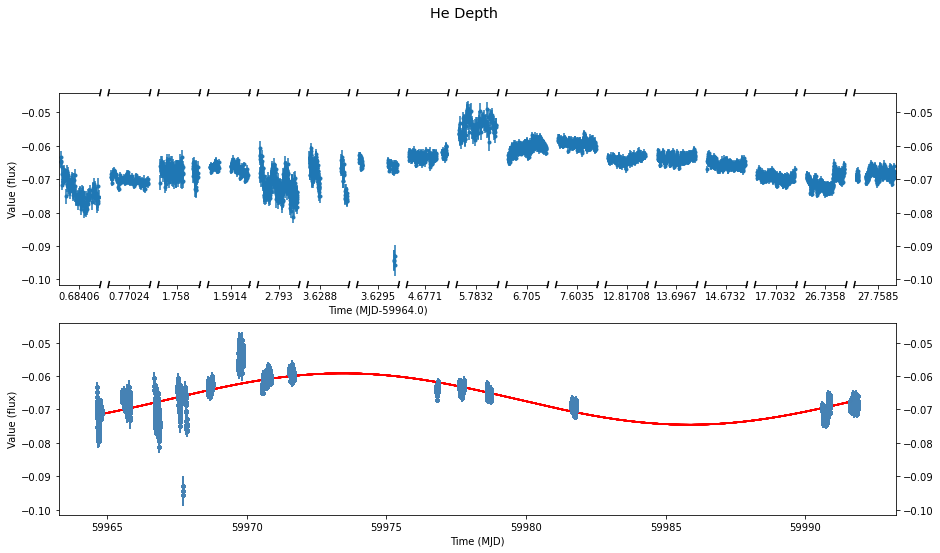

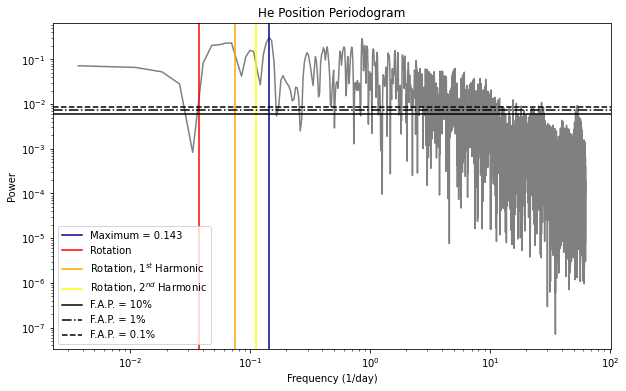

chisq=8924.288105471496  with 3404 degrees of freedom
For  Position
parameter: Amplitude Cos: -0.009878648363020865
   95% conf interval: -0.010476122276224712 -0.009281174449817018
   tstat: -27.203453618311528
   pstat: 0.0
parameter: Amplitude Sin: 0.001390137107735172
   95% conf interval: 0.0009310171899045464 0.0018492570255657975
   tstat: 4.9816930767794165
   pstat: 6.616871683906567e-07
parameter: Offset: 10833.324041741722
   95% conf interval: 10833.323758059718 10833.324325423726
   tstat: 62831208.484149836
   pstat: 0.0
parameter: Period: 6.9811515401924975
   95% conf interval: 6.981145746562845 6.98115733382215
   tstat: 1982539.2757484554
   pstat: 0.0


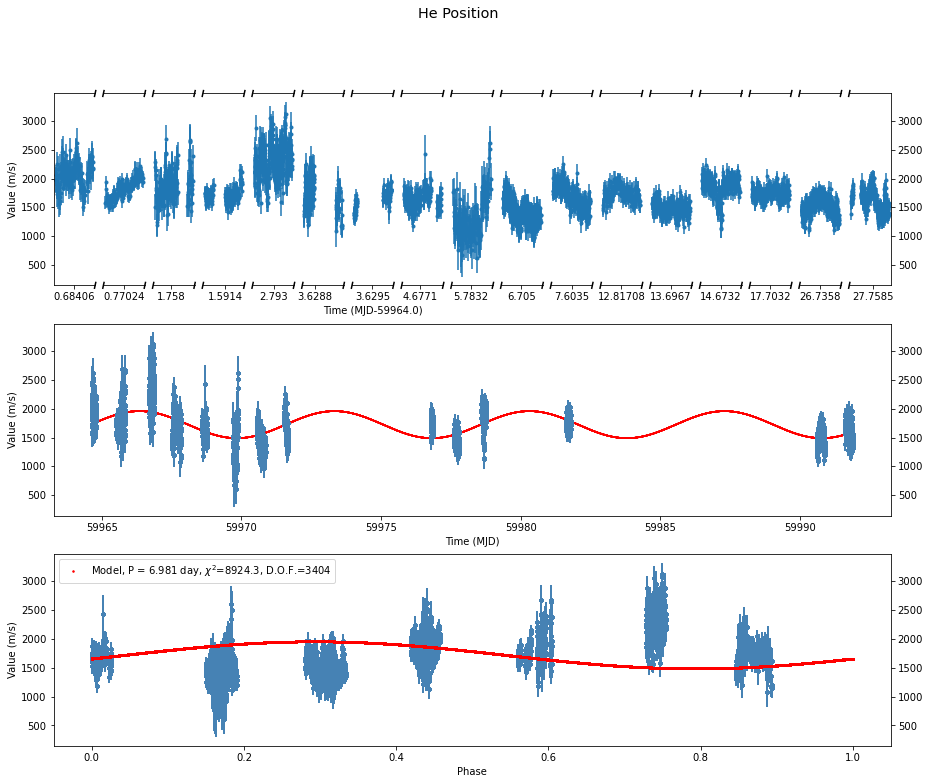

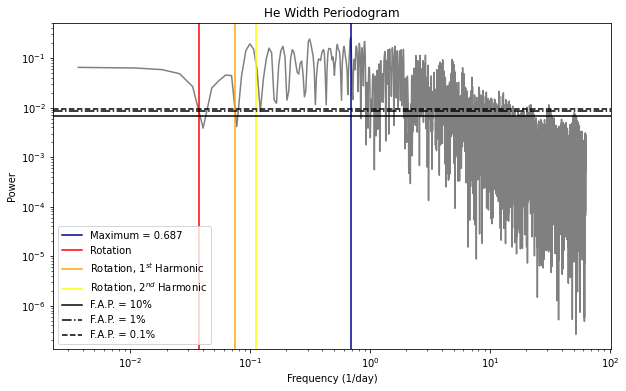

chisq=7784.626831167205  with 3404 degrees of freedom
For  Width
parameter: Amplitude Cos: -0.006517191392949153
   95% conf interval: -0.006517191392949153 -0.006517191392949153
   tstat: -inf
   pstat: 0.0
parameter: Amplitude Sin: 0.016755453005608014
   95% conf interval: 0.01620702315482361 0.01730388285639242
   tstat: 50.26672068606898
   pstat: 0.0
parameter: Offset: 0.28225069621028553
   95% conf interval: 0.2818766572020303 0.28262473521854076
   tstat: 1241.5482145966428
   pstat: 0.0
parameter: Period: 1.4564834954153756
   95% conf interval: 1.4564832341131548 1.4564837567175963
   tstat: 9170814.976352276
   pstat: 0.0


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/Analysis_functions.py:986: RuntimeWarning: divide by zero encountered in true_divide
  pstat_beta = (1.0 - ss.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values


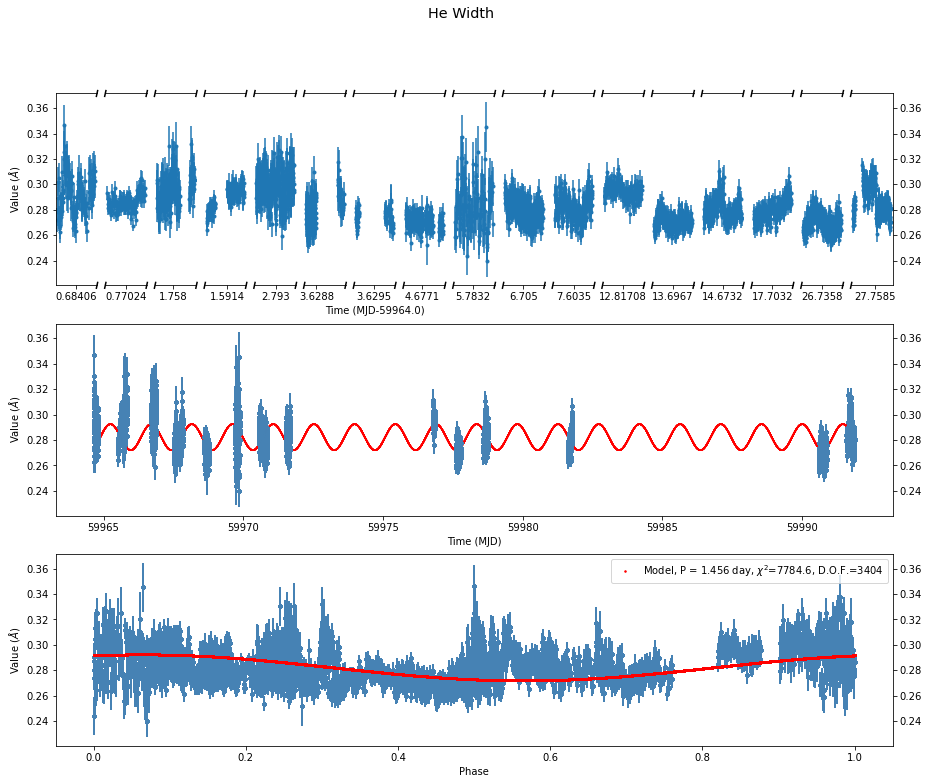

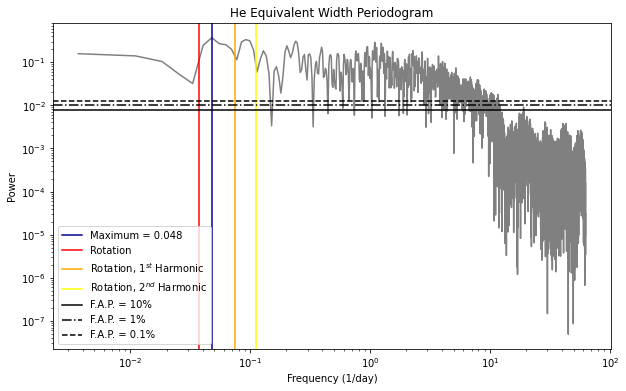

chisq=254966.2957398267  with 3404 degrees of freedom
For  Equivalent Width
parameter: Amplitude Cos: -0.10592116167091989
   95% conf interval: -0.10592116167091989 -0.10592116167091989
   tstat: -inf
   pstat: 0.0
parameter: Amplitude Sin: 0.11445816801584939
   95% conf interval: 0.11408547655670558 0.1148308594749932
   tstat: 505.29245666274477
   pstat: 0.0
parameter: Offset: 0.01802234416777443
   95% conf interval: 0.01778144923998562 0.01826323909556324
   tstat: 123.0917902171561
   pstat: 0.0
parameter: Period: 20.93507462018276
   95% conf interval: 20.935034676577885 20.935114563787636
   tstat: 862328.4625166602
   pstat: 0.0


/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/Analysis_functions.py:986: RuntimeWarning: divide by zero encountered in true_divide
  pstat_beta = (1.0 - ss.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values


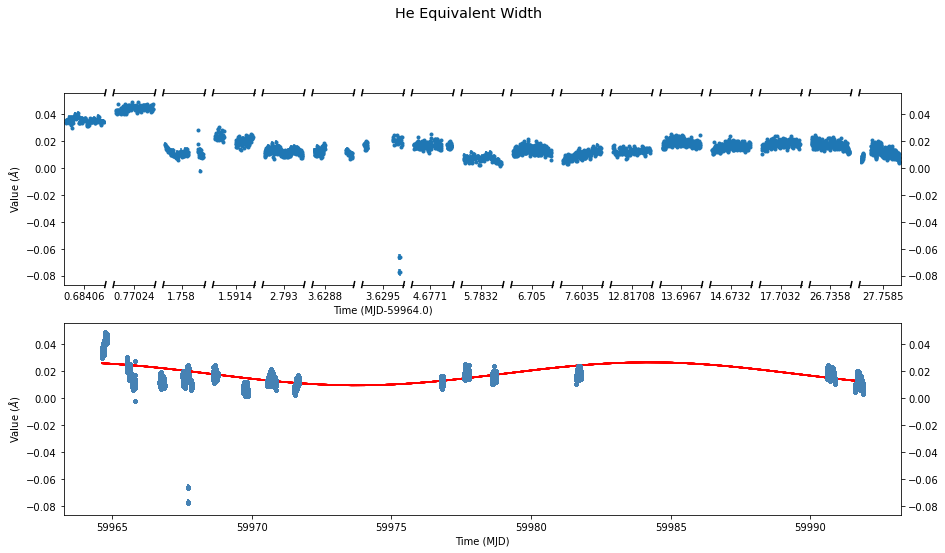

In [51]:
reload(AF)
#Frequency of oscillation 
oscillation_freq = 24*60/5.4 #in 1/days!!

#Line of interest 
line_name = 'He'

for i in range(len(params_of_interest)):
    long_param = []
    long_param_err = []
    long_time = []
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)

        param_list = [param[indexes_of_interest[i]] for param in param_dictionnary[day]]
        err_list = [err[indexes_of_interest[i]] for err in err_dictionnary[day]]
        time_list = [time for time in time_dictionnary[day]]

        long_param.append(param_list)
        long_param_err.append(err_list)
        long_time.append(time_list)

    long_param = np.array(list(itertools.chain.from_iterable(long_param)))
    long_param_err = np.array(list(itertools.chain.from_iterable(long_param_err)))
    long_time = np.array(list(itertools.chain.from_iterable(long_time)))
    
    LS = LombScargle(long_time, long_param, long_param_err).autopower(nyquist_factor=1) 
    probas = [0.1, 0.01, 0.001]
    FAP = LombScargle(long_time, long_param, long_param_err).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
    
    plt.figure(figsize=[10, 6])
    plt.loglog(LS[0], LS[1], color='grey')
    if max(LS[1])>FAP[0]:
        max_power = np.where(LS[1]==max(LS[1]))
        plt.axvline(LS[0][max_power], color='darkblue', label='Maximum = %.3f' %LS[0][max_power])
    plt.axvline(1/27, color='r', label='Rotation')
    plt.axvline(2/27, color='orange', label='Rotation, $1^{st}$ Harmonic')
    plt.axvline(3/27, color='yellow', label='Rotation, $2^{nd}$ Harmonic')
    plt.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
    plt.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
    plt.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
    plt.xlabel('Frequency (1/day)')
    plt.ylabel('Power')
    plt.title(line_name+' '+params_of_interest[i]+' Periodogram')
    plt.legend()
    plt.show()
    
    #Fitting the long-term trend to the data
    important_freq = LS[0][max_power]

    guess = [-0.0003, 0.0005, np.median(long_param), important_freq[0]**(-1)]
    best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, long_time, long_param, sigma = long_param_err, p0=guess, maxfev=1000000)
    
    #Evaluating the model
    simulated_time = np.linspace(long_time[0], long_time[-1], 10000)
    model = AF.sinusoid(simulated_time, *best_fit_theta)

    #Evaluating the goodness of fit - chi-squared
    residuals = long_param - AF.sinusoid(long_time, *best_fit_theta)
    chisq = np.sum((residuals/long_param_err)**2)
    Dof = len(long_param) - len(best_fit_theta)
    print('chisq='+str(chisq), ' with '+str(Dof)+' degrees of freedom')

    #Evaluating the statistical significance of our results
    print('For ', params_of_interest[i])
    param_name = ['Amplitude Cos', 'Amplitude Sin', 'Offset', 'Period']
    AF.eval_stat(best_fit_theta, long_time, long_param, AF.sinusoid, param_name)

    fig, axes = plt.subplot_mosaic("ABCDEFGHIJKLMNOPQ;RRRRRRRRRRRRRRRRR;SSSSSSSSSSSSSSSSS", figsize=[15, 12])
                                                                        
    subplot_list = "ABCDEFGHIJKLMNOPQ"
    
    fig.suptitle(line_name+' '+params_of_interest[i], fontsize="x-large")
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)
        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = np.array([time-excess for time in time_dictionnary[day]])
        
        if params_of_interest[i]=='Position':
            axes[subplot_list[index]].errorbar(time_list, (param_list-ref_wav)*3e8/ref_wav, yerr=err_list*3e8/ref_wav, fmt='.')
            axes['R'].plot(simulated_time, (model-ref_wav)*3e8/ref_wav, 'r', label='Model')
            axes['R'].errorbar(long_time, (long_param-ref_wav)*3e8/ref_wav, yerr=long_param_err*3e8/ref_wav, fmt='.', color='steelblue')
            
            if important_freq > 3/27:
                axes['S'].errorbar(AF.phasefold(long_time, np.mean(long_time), important_freq), (long_param-ref_wav)*3e8/ref_wav, yerr=long_param_err*3e8/ref_wav, fmt='.', color='steelblue', zorder=1)
                line1=axes['S'].plot(AF.phasefold(simulated_time, np.mean(simulated_time), important_freq), (model-ref_wav)*3e8/ref_wav, 'r.', zorder=2, markersize=3)
                
                axes['S'].set_xlabel('Phase')
                axes['S'].set_ylabel('Value '+units_of_interest[i])
                axes['S'].tick_params(left=True, right=True, labelright='off')

                axes['S'].legend(line1, ['Model, P = %.3f day'%best_fit_theta[-1]+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['S'].set_visible(False)
        else:
            axes[subplot_list[index]].errorbar(time_list, param_list, yerr=err_list, fmt='.')
            axes['R'].plot(simulated_time, model, 'r', label='Model')
            axes['R'].errorbar(long_time, long_param, yerr=long_param_err, fmt='.', color='steelblue')
            
            if important_freq > 3/27:
                axes['S'].errorbar(AF.phasefold(long_time, np.mean(long_time), important_freq), long_param, yerr=long_param_err, fmt='.', color='steelblue', zorder=1)
                line1=axes['S'].plot(AF.phasefold(simulated_time, np.mean(simulated_time), important_freq), model, 'r.', zorder=2, markersize=3)

                axes['S'].set_xlabel('Phase')
                axes['S'].set_ylabel('Value '+units_of_interest[i])
                axes['S'].tick_params(left=True, right=True, labelright='off')

                axes['S'].legend(line1, ['Model, P = %.3f day'%best_fit_theta[-1]+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['S'].set_visible(False)


        axes['R'].set_xlabel('Time (MJD)')
        axes['R'].set_ylabel('Value '+units_of_interest[i])
        axes['R'].tick_params(left=True, right=True, labelright='off')

        #Adding the breaks
        d = .015  

        if index==0:
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].set_ylabel('Value '+units_of_interest[i])
            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right

        elif index==len(fit_params_dict.keys())-1:
            axes[subplot_list[index]].sharey(axes[subplot_list[0]])
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].yaxis.tick_right()
            axes[subplot_list[index]].tick_params(labelright='off')

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs) #Bottom left

        else:
            axes[subplot_list[index]].sharey(axes[subplot_list[0]])
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].get_yaxis().set_visible(False)

            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs)
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs)
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs)

        axes[subplot_list[index]].set_xticks([np.mean(time_list)])
        axes[subplot_list[7]].set_xlabel('Time (MJD-'+str(excess)+')', ha='right')
        
    plt.show()

# Plotting the big dataset - Si Line

# Inspecting the periodograms and fitting long-term trend - Si line

# Extracting the HARPS data and plotting the Calcium stellar activity indicator

In [27]:
HARPS_file = np.loadtxt(HARPS_directory+'SUN_harps.rdb', skiprows=2)

BJD_date = HARPS_file[:, 0]
vrad = HARPS_file[:, 1]
vrad_err = HARPS_file[:, 2]
old_rhk = HARPS_file[:, 9]
old_rhk_err = HARPS_file[:, 10]

low_rhk = -5.02
high_rhk = -4.95

rhk_BJD_date = AF.bound(low_rhk, high_rhk, old_rhk, BJD_date)
rhk = AF.bound(low_rhk, high_rhk, old_rhk, old_rhk)
rhk_err = AF.bound(low_rhk, high_rhk, old_rhk, old_rhk_err)
new_vrad = AF.bound(low_rhk, high_rhk, old_rhk, vrad)
new_vrad_err = AF.bound(low_rhk, high_rhk, old_rhk, vrad_err)

For R_HK
parameter: Amplitude Cos: 6.486720365168196
   95% conf interval: -135.36195100799284 148.33539173832924
   tstat: 0.07521945616176115
   pstat: 0.9400402176804243
parameter: Amplitude Sin: 16.18958509201541
   95% conf interval: -47.326097269672545 79.70526745370336
   tstat: 0.41926155007481153
   pstat: 0.6750256715525622
parameter: Offset: 1.4698150177568643
   95% conf interval: -140.3788673543405 143.31849738985426
   tstat: 0.017043848277323047
   pstat: 0.9864016605704313
parameter: Period: 63820.77504569693
   95% conf interval: -634885.3204982762 762526.8705896699
   tstat: 0.15024423854227126
   pstat: 0.8805721527569077
Max. period from periodogram =  16440.616410000002  days


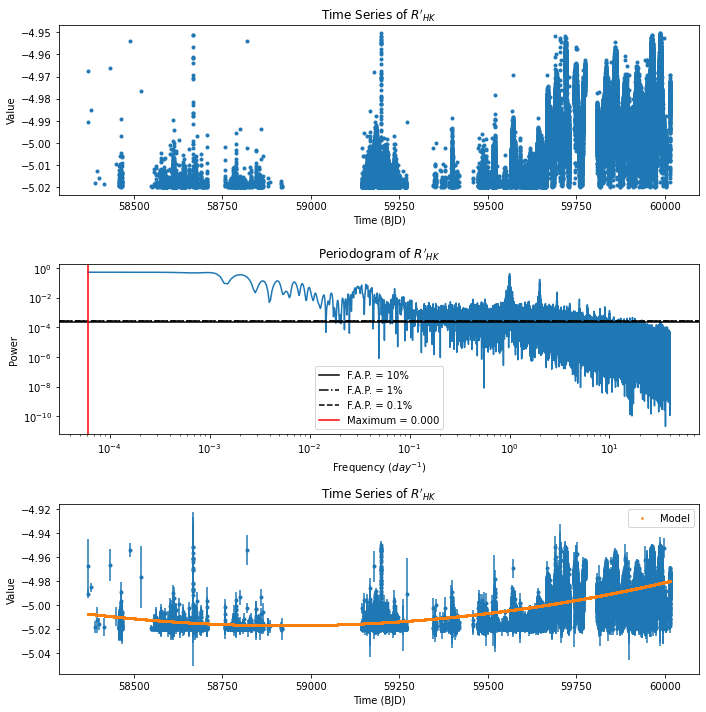

For Vrad
parameter: Amplitude Cos: -0.016726211610490586
   95% conf interval: -0.01686951936508258 -0.01658290385589859
   tstat: -191.98096955272808
   pstat: 0.0
parameter: Amplitude Sin: 4.811548536388734
   95% conf interval: 3.352110939969835 6.270986132807632
   tstat: 5.42287540485178
   pstat: 5.8749790587953044e-08
parameter: Offset: 0.11395334524776075
   95% conf interval: 0.11384891648013343 0.11405777401538808
   tstat: 1794.8874094795053
   pstat: 0.0
parameter: Period: 402.99747400335684
   95% conf interval: 402.36482152007034 403.63012648664335
   tstat: 1047.7734560233328
   pstat: 0.0
Max. period from periodogram =  400.9906441463415  days


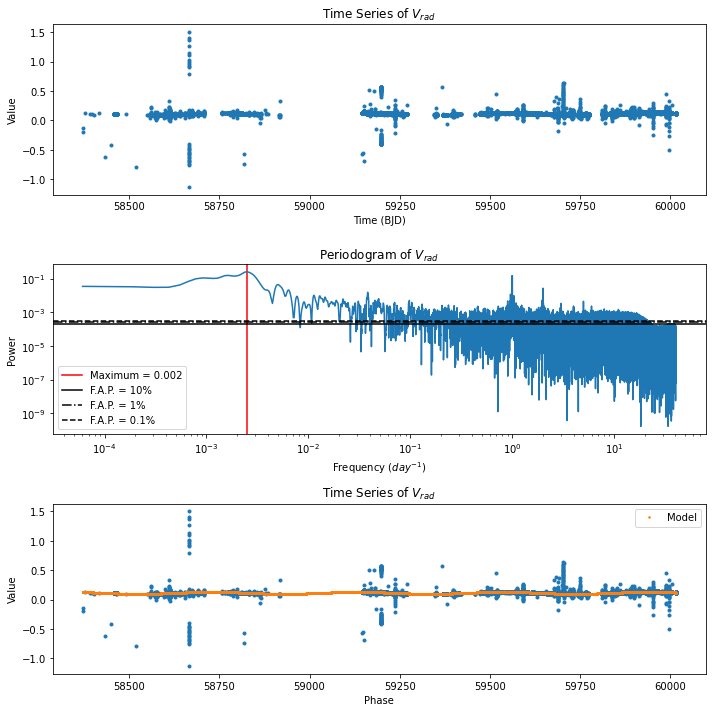

In [28]:
reload(AF)
#Calcium indicator 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10, 10])
ax1.plot(rhk_BJD_date, rhk, '.')
ax1.set_xlabel('Time (BJD)')
ax1.set_ylabel('Value')
ax1.set_title('Time Series of $R\'_{HK}$')

ls = LombScargle(rhk_BJD_date, rhk, rhk_err)
LS = ls.autopower(nyquist_factor=1)
probas = [0.1, 0.01, 0.001]
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

ax2.loglog(LS[0], LS[1])
ax2.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
ax2.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
ax2.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')

if max(LS[1])>FAP[0]:
    max_power= np.where(LS[1]==max(LS[1]))
    ax2.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
ax2.set_xlabel('Frequency ($day^{-1}$)')
ax2.set_ylabel('Power')
ax2.set_title('Periodogram of $R\'_{HK}$')
ax2.legend()

#Fitting the long-term trend to the data
important_freq = LS[0][max_power]

#Setting a guess
iniguess=[0.4, 1e-5, np.median(rhk), important_freq[0]**(-1)]

best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, rhk_BJD_date, rhk, sigma=rhk_err, p0=iniguess, maxfev=20000)

#Evaluating the model
simulated_time = np.linspace(rhk_BJD_date[0], rhk_BJD_date[-1], 10000)
model = AF.sinusoid(simulated_time, *best_fit_theta)

#Evaluating statistical significance
print('For R_HK')
param_name = ['Amplitude Cos', 'Amplitude Sin', 'Offset', 'Period']
AF.eval_stat(best_fit_theta, rhk_BJD_date, rhk, AF.sinusoid, param_name)
print('Max. period from periodogram = ', 1/important_freq[0], ' days')

ax3.errorbar(rhk_BJD_date, rhk, yerr=rhk_err, fmt='.', zorder=1)
ax3.plot(simulated_time, model, '.', label='Model', markersize=3, zorder=2)
ax3.set_xlabel('Time (BJD)')
ax3.set_ylabel('Value')
ax3.set_title('Time Series of $R\'_{HK}$')
ax3.legend()
fig.tight_layout()
plt.show()

#Radial velocity
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10, 10])
ax1.errorbar(rhk_BJD_date, new_vrad, yerr=new_vrad_err, fmt='.')
ax1.set_xlabel('Time (BJD)')
ax1.set_ylabel('Value')
ax1.set_title('Time Series of $V_{rad}$')

ls = LombScargle(rhk_BJD_date, new_vrad, new_vrad_err)
LS = ls.autopower(nyquist_factor=1)
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

if max(LS[1])>FAP[0]:
    max_power = np.where(LS[1]==max(LS[1]))
    ax2.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
ax2.loglog(LS[0], LS[1])
ax2.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
ax2.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
ax2.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
ax2.set_xlabel('Frequency ($day^{-1}$)')
ax2.set_ylabel('Power')
ax2.set_title('Periodogram of $V_{rad}$')
ax2.legend()

#Fitting the long-term trend to the data
important_freq = LS[0][max_power]

#Setting a guess
iniguess=[0.1, 0.1, np.median(new_vrad), important_freq[0]**(-1)]
best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, rhk_BJD_date, new_vrad, sigma=new_vrad_err, p0=iniguess)

#Evaluating the model
simulated_time = np.linspace(rhk_BJD_date[0], rhk_BJD_date[-1], 10000)
model = AF.sinusoid(simulated_time, *best_fit_theta)

#Statistical Significance
print('For Vrad')
AF.eval_stat(best_fit_theta, rhk_BJD_date, new_vrad, AF.sinusoid, param_name)
print('Max. period from periodogram = ', 1/important_freq[0], ' days')
ax3.errorbar(rhk_BJD_date, new_vrad, yerr=new_vrad_err, fmt='.', zorder=1)
ax3.plot(simulated_time, model, '.', label='Model', markersize=3, zorder=2)
ax3.set_xlabel('Phase')
ax3.set_ylabel('Value')
ax3.set_title('Time Series of $V_{rad}$')
ax3.legend()
fig.tight_layout()


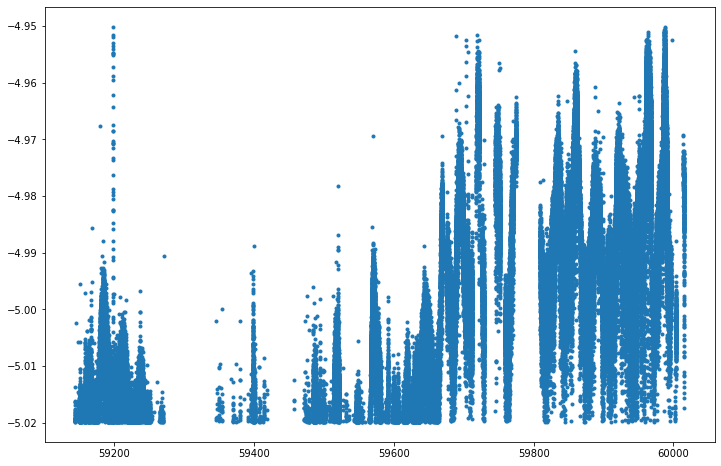

In [29]:
plt.figure(figsize=[12, 8])
plt.plot(rhk_BJD_date[rhk_BJD_date>59000], rhk[rhk_BJD_date>59000], '.')

In [30]:
cut_value = 59940

cut_rhk_BJD_date = rhk_BJD_date[rhk_BJD_date>cut_value]
cut_rhk = rhk[rhk_BJD_date>cut_value]
cut_rhk_err = rhk_err[rhk_BJD_date>cut_value]

#Take only the values during best airmass conditions
cut_down = 0.15
cut_up = 0.25
#Find the start dates for each day
integer_dates = np.unique(np.around(cut_rhk_BJD_date))
best_rhk = []
best_date = []
best_rhk_err = []

#Keep the values only in a certain range
for i in range(len(cut_rhk_BJD_date)):
    for j in range(len(integer_dates)):
        if cut_rhk_BJD_date[i]<integer_dates[j]+cut_up and cut_rhk_BJD_date[i]>integer_dates[j]+cut_down:
            best_date.append(cut_rhk_BJD_date[i])
            best_rhk.append(cut_rhk[i])
            best_rhk_err.append(cut_rhk_err[i])

best_date = np.array(best_date)
best_rhk = np.array(best_rhk)
best_rhk_err = np.array(best_rhk_err)


In [31]:
#Bin the values to one value for each day

#Find the start dates for each day
integer_dates = np.unique(np.around(best_date))
bin_best_rhk = []
bin_best_date = []
bin_best_rhk_err = []

for j in range(len(integer_dates)):
    store_time = []
    store_rhk = []
    store_err = []
    for i in range(len(best_date)):
        if best_date[i] >= integer_dates[j-1] and best_date[i] < integer_dates[j]:
            store_time.append(best_date[i])
            store_rhk.append(best_rhk[i])
            store_err.append(best_rhk_err[i])
    #Skipping first iteration because it is an empty list
    if j>=1:
        bin_best_date.append(np.mean(store_time))
        bin_best_rhk.append(np.mean(store_rhk))
        bin_best_rhk_err.append(np.mean(store_err))

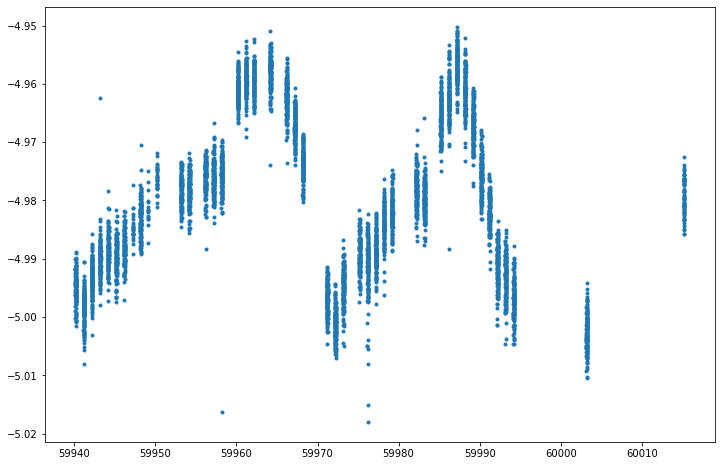

In [32]:
plt.figure(figsize=[12, 8])
plt.plot(best_date, best_rhk, '.')

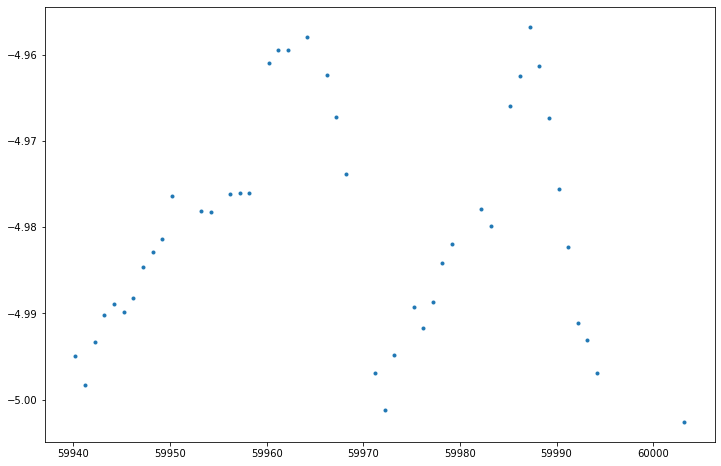

In [33]:
%matplotlib inline 
plt.figure(figsize=[12, 8])
plt.plot(bin_best_date, bin_best_rhk, '.')

Max. period =  27.391779194832726  days


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


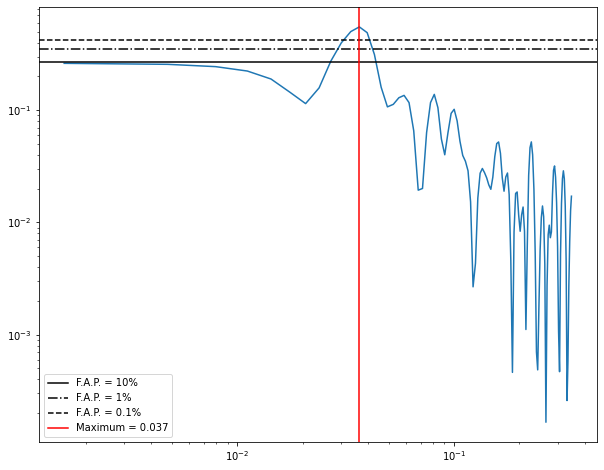

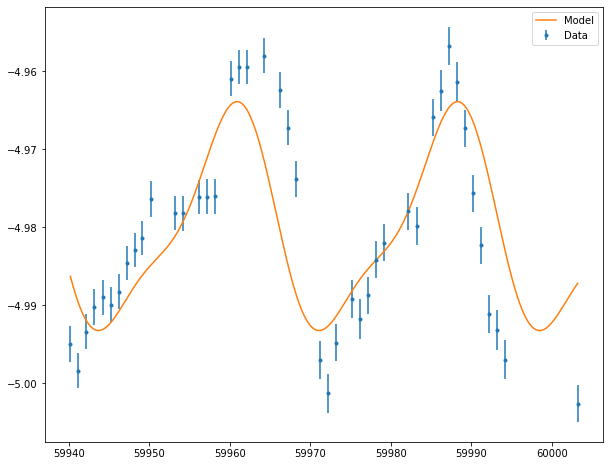

In [94]:
#Perform a periodogram to find the max period of the new binned R_HK signal

ls = LombScargle(bin_best_date, bin_best_rhk, bin_best_rhk_err)
LS = ls.autopower(nyquist_factor=1)
probas = [0.1, 0.01, 0.001]
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

plt.figure(figsize=[10, 8])
plt.loglog(LS[0], LS[1])
plt.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
plt.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
plt.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
if max(LS[1])>FAP[0]:
    max_power= np.where(LS[1]==max(LS[1]))
    plt.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
plt.legend()
print('Max. period = ', 1/LS[0][max_power][0], ' days')


#Using this max period to model the R_HK
period = 1/LS[0][max_power][0]
period2 = period/2
period3 = period/3

#Making the linear model
def big_model(t, offset, a, b, c, A, B, C, D, E, F):
    first_part = a*(A*np.cos(2*np.pi*t/period) + B*np.sin(2*np.pi*t/period))
    second_part = b*(C*np.cos(2*np.pi*t/period2) + D*np.sin(2*np.pi*t/period2))
    third_part = c*(E*np.cos(2*np.pi*t/period3) + F*np.sin(2*np.pi*t/period3))
    return offset+first_part+second_part#+third_part

#Fitting the linear model
best_fit_theta, best_fit_err = curve_fit(big_model, bin_best_date, bin_best_rhk, sigma=bin_best_rhk_err)

#Simulating best-fit model points
model_time = np.linspace(min(bin_best_date), max(bin_best_date), 1000)
model_data = big_model(model_time, *best_fit_theta)

plt.figure(figsize=[10, 8])
plt.errorbar(bin_best_date, bin_best_rhk, yerr=bin_best_rhk_err, fmt='.', label='Data')
plt.plot(model_time, model_data, label='Model')
plt.legend()
plt.show()

# Interpolating the $R_{HK}$ and $V_{rad}$ values to the observations

In [95]:
%matplotlib inline

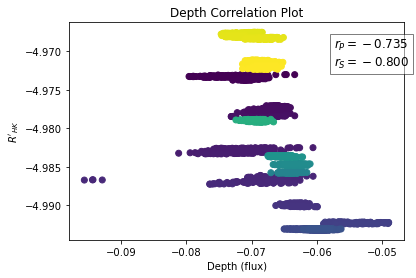

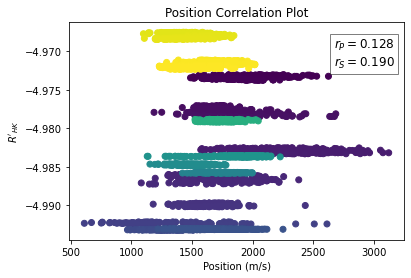

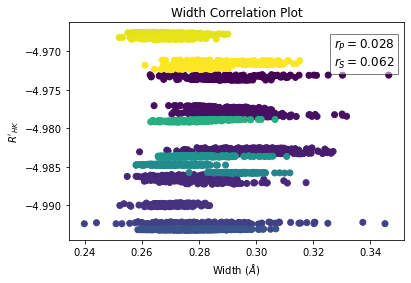

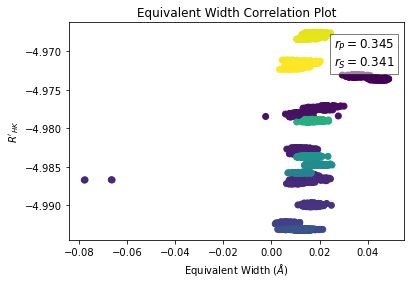

In [106]:
reload(AF)

#Loop over the parameters of interest
for i in range(len(params_of_interest)):
    long_param = []
    long_param_err = []
    long_time = []
    long_model = []

    fig, ax = plt.subplots(1)
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)
        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = [time for time in time_dictionnary[day]]

        mod_time = np.linspace(time_list[0], time_list[-1], len(time_list))
        model_data = big_model(mod_time, *best_fit_theta)
        
        #Plotting individual correlation plots
        #AF.Correlation_Plot([], param_list, model_data, err_list, [], 'He '+params_of_interest[i], '$R\'_{HK}$', params_of_interest[i], day)

        #Plotting a general correlation plot
        if params_of_interest[i]=='Position':
            ax.scatter((param_list-ref_wav)*3e8/ref_wav, model_data, c=time_list, norm=mc.Normalize(59964.64296989, 59991.87841389))
        else:
            ax.scatter(param_list, model_data, c=time_list, norm=mc.Normalize(59964.64296989, 59991.87841389))
        ax.set_xlabel(params_of_interest[i]+' '+units_of_interest[i])
        ax.set_ylabel('$R\'_{HK}$')
        ax.set_title(params_of_interest[i]+' Correlation Plot')
        
        long_param.append(param_list)
        long_param_err.append(err_list)
        long_time.append(time_list)
        long_model.append(model_data)

    long_param = np.array(list(itertools.chain.from_iterable(long_param)))
    long_param_err = np.array(list(itertools.chain.from_iterable(long_param_err)))
    long_time = np.array(list(itertools.chain.from_iterable(long_time)))
    long_model = np.array(list(itertools.chain.from_iterable(long_model)))

    textstr = '\n'.join((r"$r_P = %.3f$" % (np.corrcoef(long_param, long_model)[0][1], ), 
                            r"$r_S = %.3f$" % (ss.spearmanr(long_param, long_model).correlation, )))
    ax.text(0.79, 0.80, textstr, transform=ax.transAxes, fontsize=12, bbox = dict(facecolor='white', alpha=0.5))
    plt.show()
#AF.Correlation_Plot([], )

In [17]:
import emcee
from tqdm import tqdm
reload(AF)

t = np.linspace(0, 100, 1000)

test = 4.5 * np.sin(2*np.pi*t/5) + 5.5 * np.cos(2*np.pi*t/5) + 1

# Define the log-likelihood function
def log_likelihood(parameters, time, depth):
    amplitude, phase, offset, period = parameters
    model_predictions = AF.sinusoid(time, amplitude, phase, offset, period)
    residuals = test - model_predictions
    chi_squared = np.sum(residuals**2)
    log_likelihood = -0.5 * chi_squared
    return log_likelihood

# Define the log-prior function
def log_prior(parameters):
    # Uniform priors on all parameters
    amplitude, phase, offset, period = parameters
    if 0 < amplitude < 100 and 0 < period < 10 and -np.pi < phase < np.pi and -1000 < offset < 1000:
        return 0.0
    return -np.inf

# Define the log-posterior function
def log_posterior(parameters, time, depth):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(parameters, time, depth)

# Set up the MCMC sampler
nwalkers = 32
ndim = 4
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(t, test))

# Initialize the walkers
p0 = np.random.rand(nwalkers, ndim)

# Run the MCMC sampler
nsteps = 100000
sampler.run_mcmc(p0, nsteps, progress=True)

# Extract the chain and discard burn-in samples
burnin = nsteps/4
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

# Plot the posterior samples
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ["Amplitude", "Frequency", "Phase", "Offset"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Step number")

plt.show()


100%|██████████████████████████████████| 100000/100000 [03:04<00:00, 540.82it/s]


TypeError: slice indices must be integers or None or have an __index__ method

In [105]:
time_dictionnary

{'2023-01-20 HA': array([59964.64296989, 59964.64367946, 59964.64438903, 59964.6450986 ,
        59964.64580817, 59964.64651774, 59964.64722731, 59964.64793688,
        59964.64864645, 59964.64935602, 59964.65006559, 59964.65077516,
        59964.65148473, 59964.6521943 , 59964.65290387, 59964.65361344,
        59964.65432301, 59964.65503258, 59964.65574215, 59964.65645172,
        59964.65716129, 59964.65787086, 59964.65858043, 59964.65929   ,
        59964.65999957, 59964.66070914, 59964.66141871, 59964.66212828,
        59964.66283785, 59964.66354742, 59964.66425699, 59964.66496656,
        59964.66567613, 59964.66638571, 59964.66709528, 59964.66780485,
        59964.66851442, 59964.66922399, 59964.66993356, 59964.67064313,
        59964.6713527 , 59964.67206227, 59964.67277184, 59964.67348141,
        59964.67419098, 59964.67490055, 59964.67561012, 59964.67631969,
        59964.67702926, 59964.67773883, 59964.6784484 , 59964.67915797,
        59964.67986754, 59964.68057711, 59964.6